In [4]:
import sys
!{sys.executable} -m pip install nose
!{sys.executable} -m pip install otter-grader
!{sys.executable} -m pip install seaborn

In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("05-exercise-pids2023.ipynb")

# Exercise sheet 5
**Hello everyone!**

# Points: 15 (+2 bonus)

Topics of this exercise sheet are:
* Working with probability distributions

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [Piazza](https://piazza.com/class/leibdr4lk8n3w4), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids23).

Please submit this exercise sheet on **GRADESCOPE**.
Naming conventions:
* Name of notebook: "05-exercise-pids2023.ipynb"

Your notebook will be automatically graded using gradescope. To get graded, you need to upload the file *05-exercise-pids2023.ipynb* to gradescope. If you are using JupyterHub, make sure you have saved the current notebook, then you can download this file by following: *File*->*Download* and save the file on you computer.

The sheet is released before the exercise session on Tuesday. You have until the next exercise session on Tuesday to submit this sheet. Most of the questions of the exercise sheet can be handle during the session.

**Handout date**: 28.03.2023 <br>
**Submission date**: 04.04.2023 before 16:00 <br>


### Please name the variables as suggested! Be careful with the type! Otherwise the grading system will fail you!

## Introduction:
This exercise is designed to help you become familiar with the fundamental concepts of probability and statistics. To ensure that you have a strong grasp of these concepts, we recommend reading this article:
https://towardsdatascience.com/an-in-depth-crash-course-on-random-variables-a3905d03e322

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

## Question 1 (6 points + 1 bonus)

### Binomial distribution:
The binomial distribution with parameters $n$ and $p$ is a class of the discrete probability distributions of <b> the number of successes in a sequence of $n$ independent experiments, </b> each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $1 − p$). Let $X$ denote a random variable with binomial distribution. The probability of having $x$ times a success in $n$ trials, is:
$$
    p(x) = \binom{n}{x}p^x (1-p)^{n-x} 
$$

In [7]:
n = 20 # The total number of trials
p = 0.5 # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a) (2 points)
Make a visual representation of the binomial distribution.
To do that, generate 10,000 independent realizations of the random variable $X$. These 10,000 samples will be distributed as a binomial distribution with parameters $p=0.5$ and $n=20$. 
**Save the samples in a variable named 'x'**.

In other words, this is equivalent to reproduce 10,000 independent experiments, where each experiment consists of flipping 20 coins and counting the number of times it hit 'tails' or 'heads'.

Plot a histogram of the generated samples.

Hint: You can use "X.rvs(...)" to generate independent samples from the random variable $X$.

In [8]:
n_samples = 10_000
np.random.seed(0)

x = X.rvs(n_samples)
x

array([10, 11, 11, ..., 12,  6, 12], dtype=int64)

In [9]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b (1 point)
Calculate the probabilities $\text{P}(X = 8)$, $\text{P}(X = 10)$ and $\text{P}(X = 12)$ and store them in the variables 'p8', 'p10', and 'p12', respectively.

Hint: Use X.pmf()

In [10]:
p8 = X.pmf(8)
p10 = X.pmf(10)
p12 = X.pmf(12)
print('P(X=8)={:.4f} \nP(X=10)={:.4f} \nP(X=12)={:.4f}'.format(p8, p10, p12))

P(X=8)=0.1201 
P(X=10)=0.1762 
P(X=12)=0.1201


In [11]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

Which point has the highest probability? Why?

P(X=10) because the binomial coeficient is the biggest when k is n/2 (for an even n).

### 1c (1 point bonus)
Calculate the probabilities $\text{P}(X \leq 8)$, $\text{P}(X \leq 10)$, $\text{P}(X \leq 12)$ and $\text{P}(X \leq 20)$ and store them in the variables 'p_le8', 'p_le10', 'p_le12' and 'p_le20' respectively.

Hint: Use X.cdf()

In [12]:
p_le8 = X.cdf(8)
p_le10 = X.cdf(10)
p_le12 = X.cdf(12)
p_le20 = X.cdf(20)

print('P(X<=8)={:.4f}\nP(X<=10)={:.4f}\nP(X<=12)={:.4f}\nP(X<=20)={:.4f}'.format(p_le8, p_le10, p_le12,p_le20))

P(X<=8)=0.2517
P(X<=10)=0.5881
P(X<=12)=0.8684
P(X<=20)=1.0000


In [13]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

Is there an increasing trend apparent in calculated probabilities? Also, can you explain why $\text{P}(X \leq 20)$ has the highest value of 1? 

Yes the probability increases with increasing x value. $P(X \le 20)$ is 1.0 because it's the probability that our random variable $X$ is smaller or equal to $n$ (=20), which is always true.

### 1d) (2 points)
Calculate the mean, standard deviation, and median of the samples generated in the variable 'x' (question 1,a) and store them in the variables 'mean', 'std' and 'median' respectively.

Hint: use numpy package!

In [14]:
mean = np.mean(x)
std = np.std(x)
median = np.median(x)

print('Mean={:.4f} \nStd={:.4f} \nMedian={:.4f}'.format(mean, std, median))

Mean=9.9682 
Std=2.2495 
Median=10.0000


In [15]:
grader.check("Question 1d")

Question 1d results: All test cases passed!

Does the mean value appear to be close to $n \times p$? Can you explain why we would expect this?

Yes, the mean is almost $np$ (=10). The mean and the expected value are almost the same because they are mathematically equivalent concepts, and in large sample sizes and normally distributed data, the mean converges to the expected value. ($np$ is the expected value of a $X$~$Bin(n,p)$)

## Question 2 (6 points)
### Multimodal distributions:
We will now consider samples from two different binomial distributions with distinct values of $p$.

Let $X_1$ denote a random variable with binomial distribution with parameters $p1=0.2$ and $n=20$.
Let $X_2$ denote a random variable with binomial distribution with parameters $p2=0.82$ and $n=20$.

In [16]:
n = 20
p1 = 0.2
p2 = 0.8
X1 = stats.binom(n, p1)
X2 = stats.binom(n, p2)

### 2a) (2 points)

Generate 5000 random samples from each of the two binomial distributions and store them in the variables 'x1' and 'x2', respectively. Concatenate the samples to create a unified vector 'x12', and plot a histogram of the concatenated samples.

(array([ 351., 1745., 1933.,  822.,  140.,   55.,  373., 1400., 2099.,
        1082.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

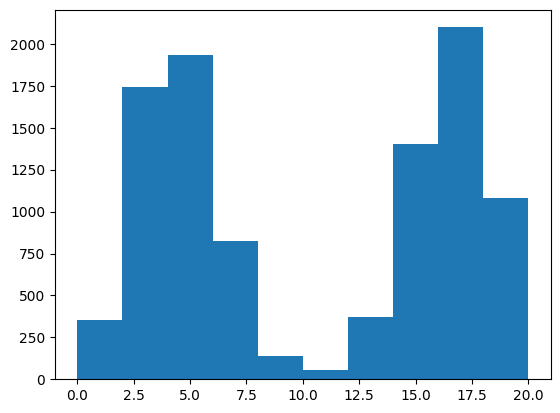

In [17]:
n_samples=5_000
np.random.seed(0)


x1 = X1.rvs(n_samples)
x2 = X2.rvs(n_samples)
x12 = np.concatenate((x1, x2))

plt.hist(x12)

In [18]:
grader.check("Question 2a")

Question 2a results: All test cases passed!

### 2b) (4 points)

Calculate the mean, median, and the first two modes of the concatenated samples in 'x', and store them in the variables 'mean', 'median', 'mode1', and 'mode2', respectively.

Hint: You can use np.unique and np.argsort to find the first and the second modes

In [19]:
mean = np.mean(x12)
median = np.median(x12)

values, counts = np.unique(x12, return_counts=True)
idx_counts = np.argsort(counts)

mode1 = values[idx_counts[-1]]
mode2 = values[idx_counts[-2]]


print('Mean: {:.2f} \nMedian: {:.2f} \nFirst mode: {:.2f}\nSecond mode: {:.2f}'.format(mean, median, mode1, mode2))

Mean: 10.01 
Median: 10.00 
First mode: 16.00
Second mode: 4.00


In [20]:
grader.check("Question 2b")

Question 2b results: All test cases passed!

Which of these estimates (mean, median and modes) is more suitable to better represent this particular type of data? Why?

The best estimate for bimodal distributions are modes. You have in this case (bimodal) 2 local maxima, and so the 2 modes describe exactly that; and being binomial distributions the local maxima corresponds aproximatly to the 2 expected values.

## Question 3 (3 points + 1 bonus)

### Normal distribution:
A normal (Gaussian) distribution is a type of continuous probability distribution characterized by a bell-shaped curve and defined by its mean $\mu$ and standard deviation $\sigma$:
$$
    p(y) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y - \mu)^2}{2\sigma^2}}
$$
We let $Y$ denote a random variable following this distribution.

In [21]:
mu = 3.0
sigma = 2.0
Y = stats.norm(loc=mu, scale=sigma)

# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 3a) (1 point)
Generate 10,000 independent samples in a variable named 'y'.

Visualize the distribution of the data plot using an histogram. Add a smooth curve obtained using a kernel density estimate (KDE) to the histogram.

Hint: you can use sns.histplot.

<AxesSubplot: ylabel='Count'>

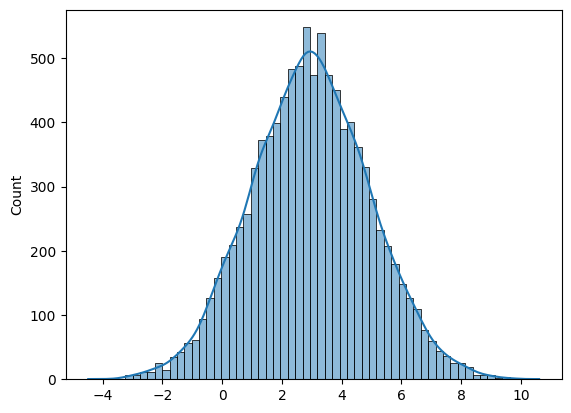

In [22]:
n_samples=10_000
np.random.seed(0)

y = Y.rvs(n_samples)

sns.histplot(y, kde=True)

In [23]:
grader.check("Question 3a")

Question 3a results: All test cases passed!

### 3b) (1 point, bonus)
Calculate the probabilities $\text{P}(Y = 2)$, $\text{P}(Y = 3)$ and $\text{P}(Y = 4)$ and store them in the variables 'p2', 'p3', and 'p4', respectively.


In [24]:
p2 = 0
p3 = 0
p4 = 0

print('P(Y=2)={:.4f} \nP(Y=3)={:.4f} \nP(Y=4)={:.4f}'.format(p2, p3, p4))

P(Y=2)=0.0000 
P(Y=3)=0.0000 
P(Y=4)=0.0000


In [25]:
grader.check("Question 3b")

Question 3b results: All test cases passed!

### 3c) (1 point)
Calculate the probabilities $\text{P}(Y \leq 2)$, $\text{P}(2 < Y \leq 3)$ and $\text{P}(Y \geq 4)$ and store them in the variables 'p_le2', 'p_gr2_le3', and 'p_gr4', respectively.


In [26]:
p_le2 = Y.cdf(2)
p_gr2_le3 = Y.cdf(3) - p_le2
p_gr4 = 1 - Y.cdf(4)

print('P(Y<=2)={:.4f}\nP(2<Y<=3)={:.4f}\nP(Y>=4)={:.4f}'.format(p_le2, p_gr2_le3, p_gr4))

P(Y<=2)=0.3085
P(2<Y<=3)=0.1915
P(Y>=4)=0.3085


In [27]:
grader.check("Question 3c")

Question 3c results: All test cases passed!

Do the probabilities $\text{P}(Y \leq 2)$ and $\text{P}(X \geq 4)$ have the same value? What is the reason for your answer?

Yes, this is because $E[X]$ for $X$~$N(\mu,\sigma^2)$ is exactly $\mu$ (=3) and, since the distance 2-3 and 3-4 are the same, the surface under the density function on one side and the other is also the same.

### 3d) (1 point)

Calculate the mean, standard deviation, and median of the samples generated in the variable 'y' and store them in the variables 'mean', 'std' and 'median' respectively.

In [28]:
mean = np.mean(y)
std = np.std(y)
median = np.median(y)

print('Mean={:.4f} \nStd={:.4f} \nMedian={:.4f}'.format(mean, std, median))

Mean=2.9631 
Std=1.9751 
Median=2.9459


In [29]:
grader.check("Question 3d")

Question 3d results: All test cases passed!

Are the mean and the standard deviation close to the $\mu$ and $\sigma$? How about the median? Why?

Yes, the mean is almost equal to $\mu$ and the standard deviation to $\sigma$. In a normal distribution, the median is equal to the mean of the distribution. This is because a normal distribution is symmetric around its mean, and so the middle value (or median) is located at the same point as the mean.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [30]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 1d results:
    Question 1d - 1 result:
        ❌ Test case failed
        Trying:
            assert_almost_equal((mean - std)/median, 0.771 , places=2)
        Expecting nothing
        **********************************************************************
        Line 1, in Question 1d 0
        Failed example:
            assert_almost_equal((mean - std)/median, 0.771 , places=2)
        Exception raised:
            Traceback (most recent call last):
              File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2544.0_x64__qbz5n2kfra8p0\lib\doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest Question 1d 0[0]>", line 1, in <module>
                assert_almost_equal((mean - std)/median, 0.771 , places=2)
              File "C:\Program Fi